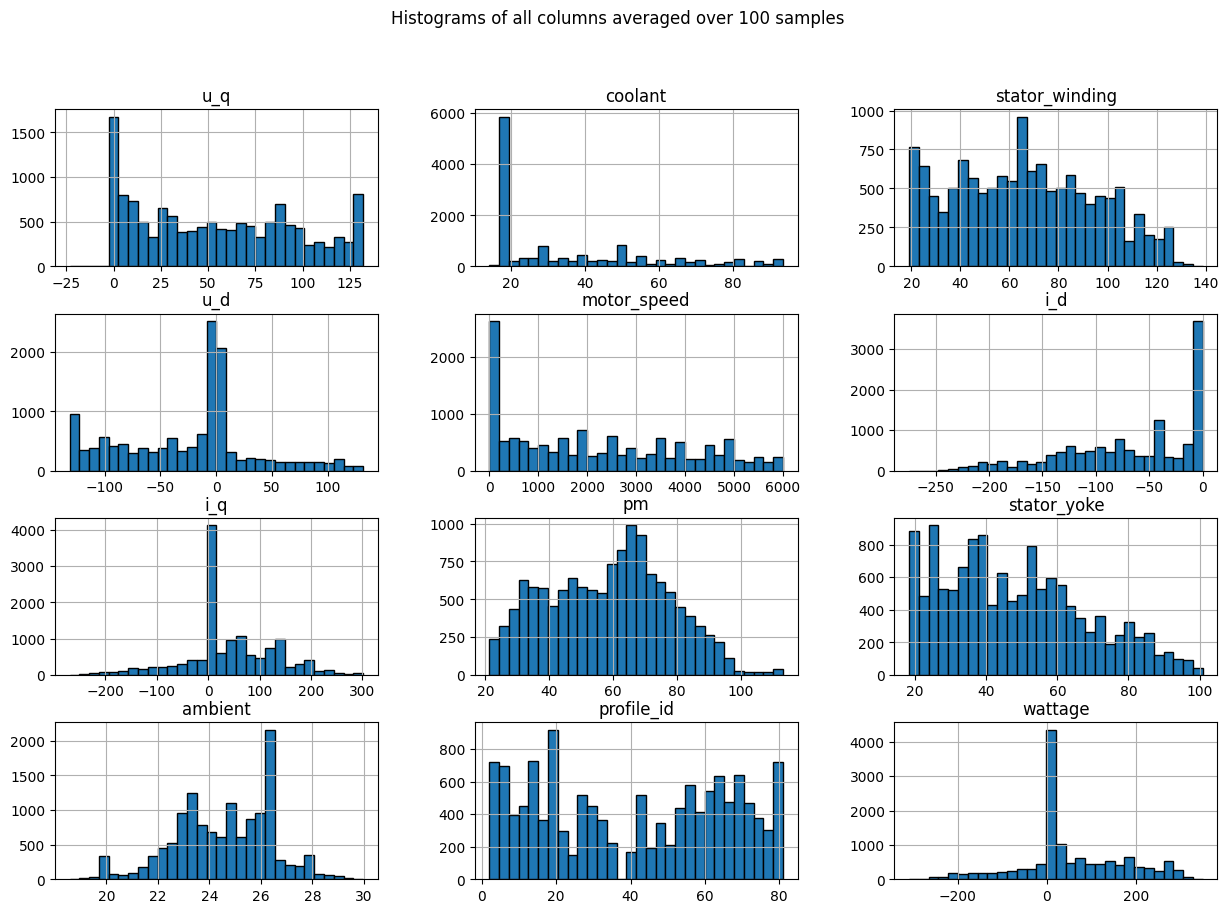

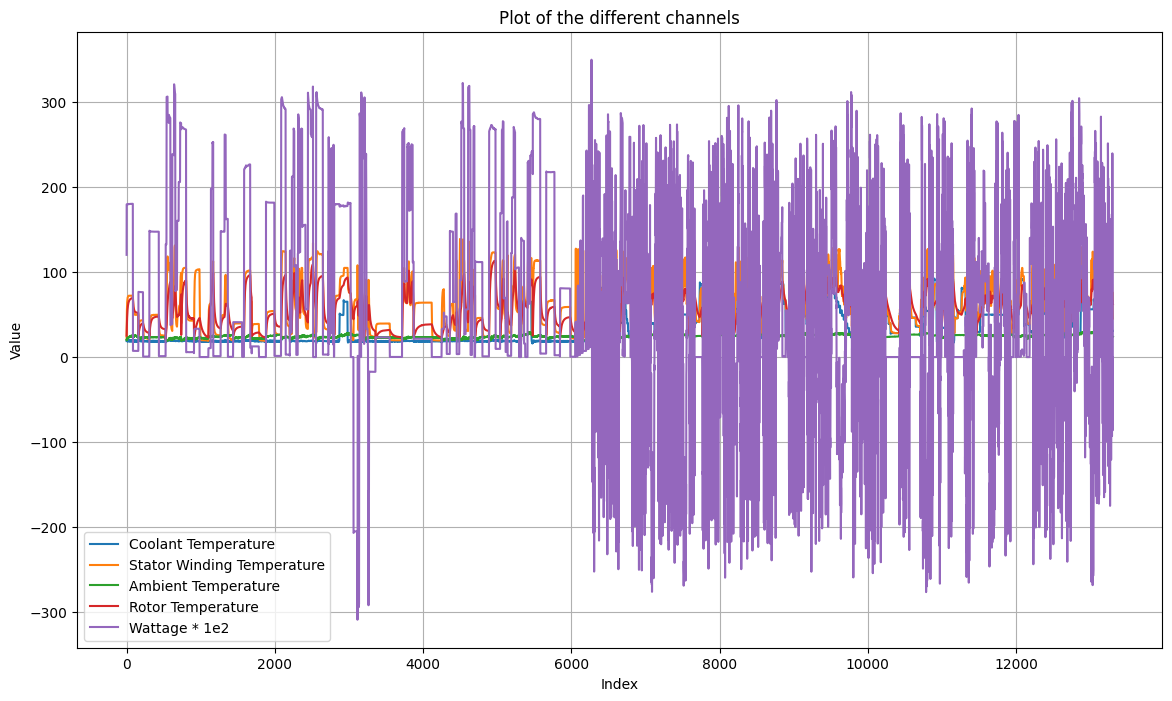

In [5]:
import os
import gdown
import pandas as pd
import matplotlib.pyplot as plt

name = 'measures_v2.csv'

#download fra google drive
if not os.path.isfile(name):
    file_id = '1XvZ2rfK3OxheTDK70n90rfrp95lCqzVs'
    download_url = f'https://drive.google.com/uc?export=download&id={file_id}'
    gdown.download(download_url, name, quiet=False)


data = pd.read_csv(name)
df=data
# df = data[data['profile_id'] == 2]

df = df.drop(columns=['torque', 'stator_tooth'])

df['wattage'] = (df['u_d'] * df['i_d'] + df['u_q'] * df['i_q']) / 100

def mean_of_chunks(df, chunk_size=100):
    return df.groupby(df.index // chunk_size).mean()

df_means = mean_of_chunks(df)

df_means.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle('Histograms of all columns averaged over 100 samples')
plt.show()

plt.figure(figsize=(14, 8))
plt.plot(df_means['coolant'], label='Coolant Temperature')
plt.plot(df_means['stator_winding'], label='Stator Winding Temperature')
plt.plot(df_means['ambient'], label='Ambient Temperature')
plt.plot(df_means['pm'], label='Rotor Temperature')
plt.plot(df_means['wattage'], label='Wattage * 1e2')
plt.title('Plot of the different channels')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

export_columns = ['stator_winding', 'ambient', 'pm', 'wattage', 'profile_id']
df_means_export = df_means[export_columns]
export_path = '../data/multichannel.csv'
df_means_export.to_csv(export_path, index=False)
